In [14]:
# Automatically reload module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# create a pipeline from the etl_pipeline package
from pipeline_executor import PipelineExecutor
topic = 'Quantum Computing' # "quantumcomputing"AND"research"

# create a pipeline executor
pipeline_executor = PipelineExecutor()
df = pipeline_executor.execute(query=topic, max_articles=None, overwrite=False)

# print the first 5 rows of the dataframe
df.head(1)

,paragraph_index,engine,link,se_description,se_source,n3k_author,n3k_published,paragraph,title,body
0,0,Google,https://interestingengineering.com/science/a-n...,"In a groundbreaking study, scientists have dem...",Interesting Engineering,['Tejasri Gururaj'],2023-06-11 08:06:58+00:00,Both experiments were conducted at exceedingly...,Splitting phonons or sound for new type of qua...,Both experiments were conducted at exceedingly...


# Approach 1
## Topic Modelling with Embeddings
In this approach, we use the embeddings that we have already created. This approach is faster but might include more stopwords in the topics.

In [35]:
from nlp_analysis.word_wizard import WordWizard

word_wizard = WordWizard(df.head(10000))
word_wizard.create_sentence_embeddings(column='paragraph')

Batches: 100%|██████████| 313/313 [00:58<00:00,  5.31it/s]


In [36]:
word_wizard.df.head(1)

,paragraph_index,engine,link,se_description,se_source,n3k_author,n3k_published,paragraph,title,body,sentences,paragraph_sentence_embeddings
0,0,Google,https://interestingengineering.com/science/a-n...,"In a groundbreaking study, scientists have dem...",Interesting Engineering,['Tejasri Gururaj'],2023-06-11 08:06:58+00:00,Both experiments were conducted at exceedingly...,Splitting phonons or sound for new type of qua...,Both experiments were conducted at exceedingly...,[Both experiments were conducted at exceedingl...,"[-0.09927327185869217, -0.038048699498176575, ..."


hi


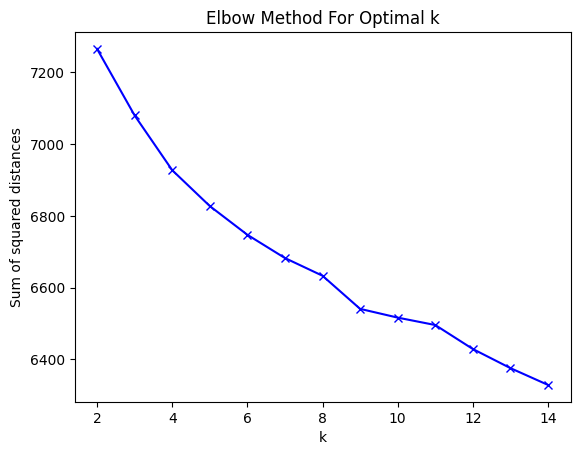

,paragraph_index,engine,link,se_description,se_source,n3k_author,n3k_published,paragraph,title,body,sentences,paragraph_sentence_embeddings,paragraph_sentence_embeddings_clusters,paragraph_sentence_embeddings_clusters_medoids
0,0,Google,https://interestingengineering.com/science/a-n...,"In a groundbreaking study, scientists have dem...",Interesting Engineering,['Tejasri Gururaj'],2023-06-11 08:06:58+00:00,Both experiments were conducted at exceedingly...,Splitting phonons or sound for new type of qua...,Both experiments were conducted at exceedingly...,[Both experiments were conducted at exceedingl...,"[-0.09927327185869217, -0.038048699498176575, ...",1,False


In [37]:
word_wizard.cluster_embeddings(column='paragraph', method='elbow')

word_wizard.df.head(1)

In [38]:
word_wizard.df['paragraph_sentence_embeddings_clusters'].value_counts()

8    1604
5    1470
7    1433
3    1214
6    1182
0    1128
4     802
1     694
2     473
Name: paragraph_sentence_embeddings_clusters, dtype: int64

In [39]:
word_wizard.reduce_demensionality(column='paragraph')
word_wizard.df.head(1)

,paragraph_index,engine,link,se_description,se_source,n3k_author,n3k_published,paragraph,title,body,sentences,paragraph_sentence_embeddings,paragraph_sentence_embeddings_clusters,paragraph_sentence_embeddings_clusters_medoids,paragraph_reduced_dimensions_word_embeddings
0,0,Google,https://interestingengineering.com/science/a-n...,"In a groundbreaking study, scientists have dem...",Interesting Engineering,['Tejasri Gururaj'],2023-06-11 08:06:58+00:00,Both experiments were conducted at exceedingly...,Splitting phonons or sound for new type of qua...,Both experiments were conducted at exceedingly...,[Both experiments were conducted at exceedingl...,"[-0.09927327185869217, -0.038048699498176575, ...",1,False,"[0.15502673387527466, 3.407186269760132]"


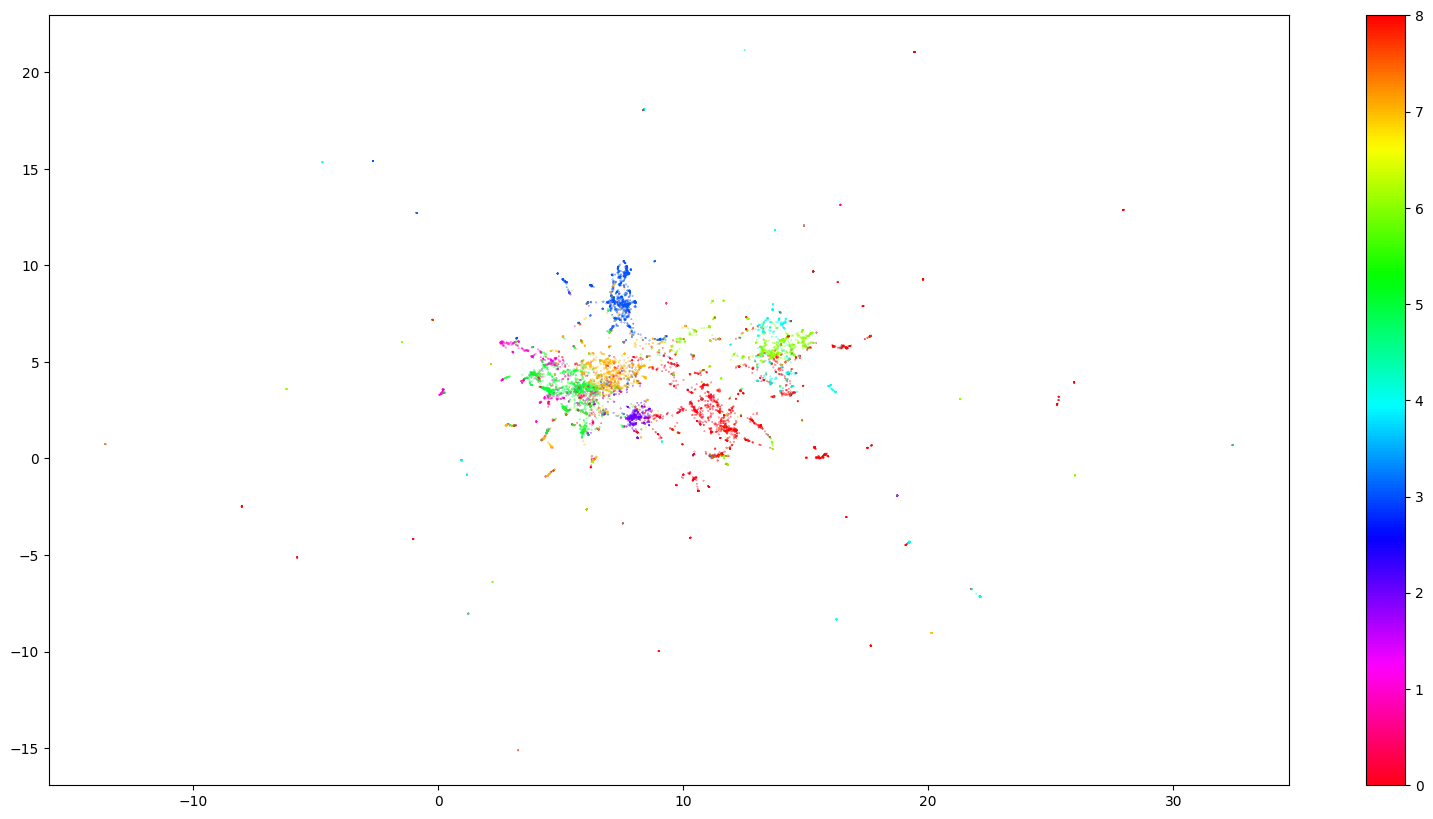

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

result = pd.DataFrame(word_wizard.df['paragraph_reduced_dimensions_word_embeddings'].tolist(), columns=['x', 'y'])
result['labels'] = word_wizard.df['paragraph_sentence_embeddings_clusters'].tolist()

# remove x, y outliers using percentile
x_min, x_max = result['x'].quantile([0.001, 0.999])
y_min, y_max = result['y'].quantile([0.001, 0.999])
result = result[(result['x'] > x_min) & (result['x'] < x_max)]
result = result[(result['y'] > y_min) & (result['y'] < y_max)]

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')

plt.colorbar()

In [41]:
x = word_wizard.topic_modelling(column='paragraph', )

In [49]:
x[5]

[('computers', 0.042142108451158775),
 ('qubits', 0.032710771508492005),
 ('classical', 0.027780573145539646),
 ('energy', 0.022177422218972873),
 ('computer', 0.021544841119867885),
 ('problems', 0.01975280138172355),
 ('bits', 0.018680249606795395),
 ('potential', 0.0179647894670327),
 ('machine', 0.017902829967832913),
 ('learning', 0.017569011166473344),
 ('computing', 0.017486984366887007),
 ('algorithms', 0.015822192654545597),
 ('error', 0.015454371574211258),
 ('calculations', 0.015151541205487071),
 ('complex', 0.014579189859857497),
 ('solve', 0.014370392900474885),
 ('researchers', 0.01397083549324121),
 ('systems', 0.013962857219964495),
 ('power', 0.01338169005425026),
 ('qubit', 0.012973226219368802)]

In [7]:
word_wizard.topic_model.visualize_barchart()

In [9]:
word_wizard.topic_model.visualize_topics()

# Approach 2: 
## Topic Modelling without Embeddings
In this approach, we don't use the embeddings and instead use BERTopic's embeddings. This approach might give better results by reducing the amount of stopwords in the topics, but it's more computationally expensive. To counteract this, we provide a `sample_size` parameter which will sample a subset of the data for the topic modelling. Feel free to adjust this parameter to fit your computational capabilities.

In [10]:
word_wizard.topic_modelling(column='paragraph', with_embeddings=False)

2023-06-15 14:54:38,742 - BERTopic - Transformed documents to Embeddings
2023-06-15 14:54:42,234 - BERTopic - Reduced dimensionality
2023-06-15 14:54:42,308 - BERTopic - Clustered reduced embeddings


In [11]:
word_wizard.topic_model.visualize_topics()

In [12]:
word_wizard.topic_model.visualize_barchart()